In [83]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
fname   = ["convnet_default.dat"]
labels  = ["convnet"]
results = [np.loadtxt(f) for f in fname]
epoch   = [results[i][:,0] for i in range(len(fname))]
batch   = [results[i][:,1] for i in range(len(fname))]
msteps  = [results[i][:,2] for i in range(len(fname))]
tr_loss = [results[i][:,3] for i in range(len(fname))]
tr_acc  = [results[i][:,4] for i in range(len(fname))]
te_acc  = [results[i][:,5] for i in range(len(fname))]
te_loss = [results[i][:,6] for i in range(len(fname))] if len(results[i][0,:]) == 7 else [-1,-1]


model 1:  convnet 
learning_rate : 0.0001
batch_size : 32
max_steps : 5000


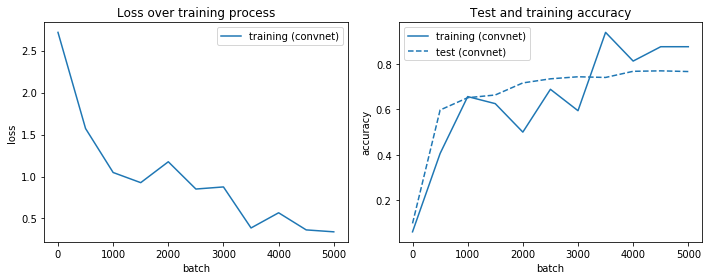

In [90]:
for i in range(len(fname)):
    f = open(fname[i], "r")
    model = f.readline()[1:-1]
    n = 3 if model == "convnet " or model == "convnet" else 5
    print("\nmodel {}: ".format(i+1), model)
    for i in range(n):
        print(f.readline()[1:-1])
    f.close()

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("Loss over training process")
for i in range(len(fname)):
    p=plt.plot(batch[i], tr_loss[i], label = "training ({})".format(labels[i]))
    plt.plot(batch[i],te_loss[i],"--",color=p[0].get_color(),label="test ({})".format(labels[i])) if te_loss[i]!=-1 else 0
plt.ylabel("loss")
plt.xlabel("batch")
plt.legend()

plt.subplot(122)
plt.title("Test and training accuracy")
for i in range(len(fname)):
    p=plt.plot(batch[i], tr_acc[i], label = "training ({})".format(labels[i]))
    plt.plot(batch[i], te_acc[i], "--", color=p[0].get_color(),label = "test ({})".format(labels[i]))
plt.ylabel("accuracy")
plt.xlabel("batch")
plt.legend()

plt.tight_layout()
plt.show()

In [101]:
np.mean(te_acc[0][-5:])

0.757